# Multi-variate Linear Regression

In [14]:
#importing all required Python libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")



In [15]:
#loading the dataset

df = pd.read_csv('Advertising.csv')
df.head().T

,0,1,2,3,4
TV,230.1,44.5,17.2,151.5,180.8
radio,37.8,39.3,45.9,41.3,10.8
newspaper,69.2,45.1,69.3,58.5,58.4
sales,22.1,10.4,9.3,18.5,12.9


In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


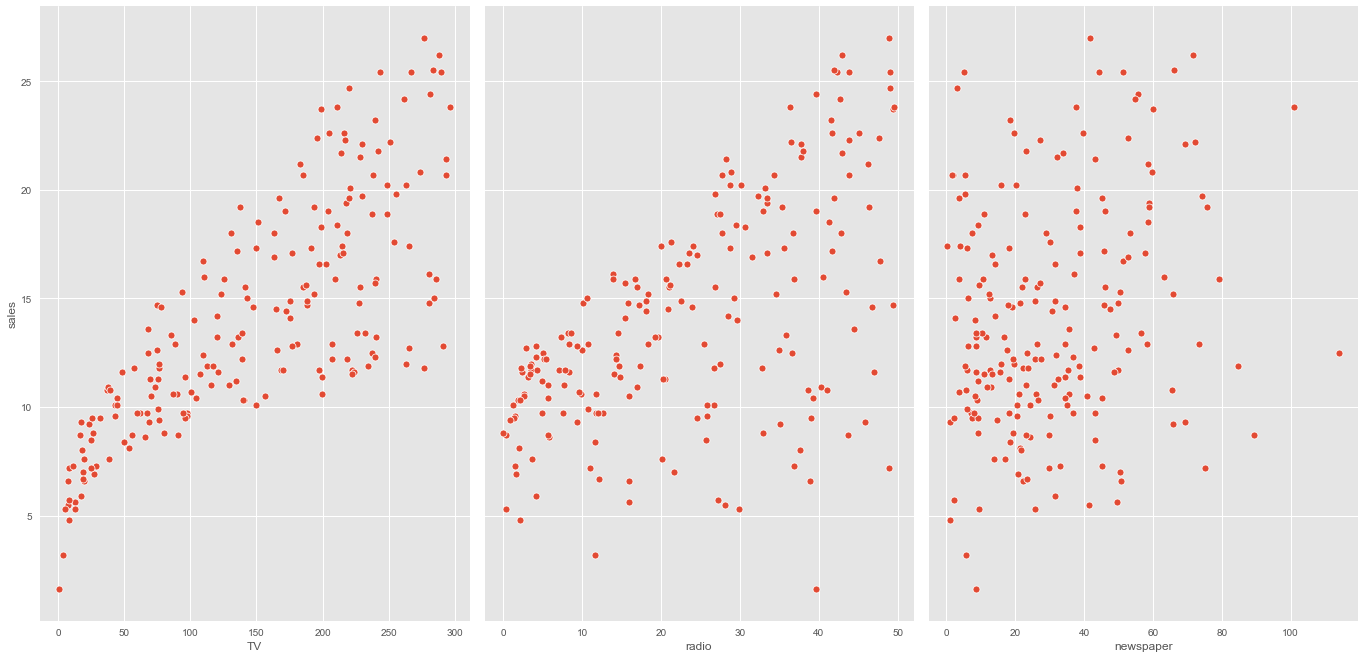

In [18]:
#we can check relationship between each individual feature and target/output using below charts

sns.pairplot(df, x_vars =['TV', 'radio', 'newspaper'], y_vars = ['sales'], height = 9, aspect = 0.7)

Multiple Linear Regression:  hypothesis to predict future values

𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+...+𝛽𝑝𝑋𝑝+𝜖

𝑠𝑎𝑙𝑒𝑠=𝛽0+𝛽1×𝑇𝑉+𝛽2×𝑟𝑎𝑑𝑖𝑜+𝛽3×𝑛𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟+𝜖


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['TV', 'radio', 'newspaper']]
y = df.sales

lm1 = LinearRegression().fit(X,y)

print("intercept value: ",lm1.intercept_)
print("coefficients: ")
print(list(zip(['TV', 'radio', 'newspaper'], lm1.coef_)))

lm1_predict = lm1.predict(X)
print("R^2: ", r2_score(y, lm1_predict))

intercept value:  2.9388893694594067
coefficients: 
[('TV', 0.04576464545539761), ('radio', 0.18853001691820462), ('newspaper', -0.0010374930424762972)]
R^2:  0.8972106381789522


In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


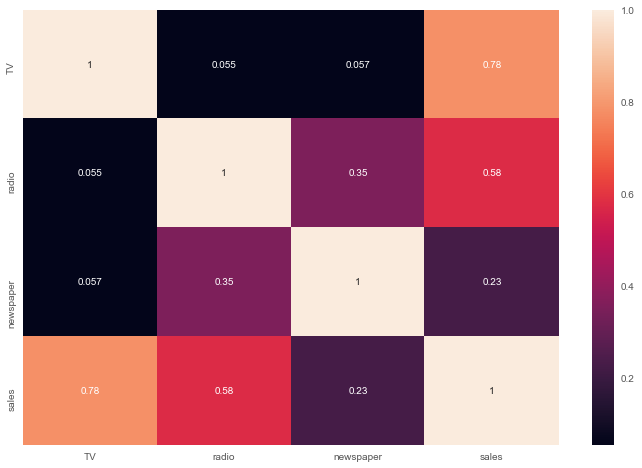

In [21]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(df.corr(), annot=True)

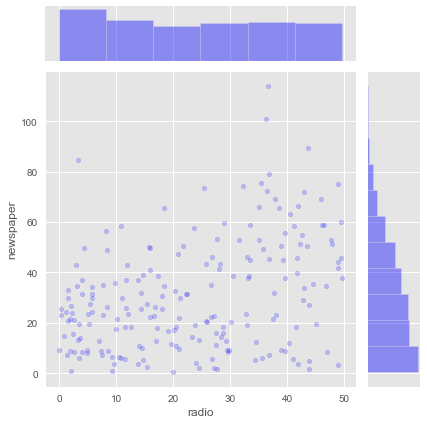

In [22]:
sns.jointplot(x= df['radio'], y = df['newspaper'],
joint_kws={'alpha':0.2,'s':20,'color':'blue'}, marginal_kws={'color':'blue'})

In [23]:
#selecting features based on which features are helpful in predicting output which are not.

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_predict = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_predict))

R^2:  0.8971942610828956


In [24]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_predict = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_predict))

#there is not much increase in r^2 value with addition of 'newspaper' feature in model so we will skip this feature 
#as for more generalized prediction it can be the case of overfitting

R^2:  0.8972106381789522


In [25]:
#Model Evaluation Using Train/Test Split and Metrics

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df[['TV', 'radio', 'newspaper']]
y = df.sales
X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_predict = lm4.predict(X_test)

print("RMS Root Mean Squared Error: ", np.sqrt(mean_squared_error(lm4_predict, y_test)))
print("R^2: ", r2_score(y_test, lm4_predict))

RMS Root Mean Squared Error:  1.4046514230328955
R^2:  0.9156213613792232


In [26]:
X = df[['TV', 'radio']]
y = df.sales
X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_predict = lm5.predict(X_test)

print("RMS Root Mean Squared Error: ", np.sqrt(mean_squared_error(lm5_predict, y_test)))
print("R^2: ", r2_score(y_test, lm5_predict))

RMS Root Mean Squared Error:  1.3879034699382888
R^2:  0.9176214942248908


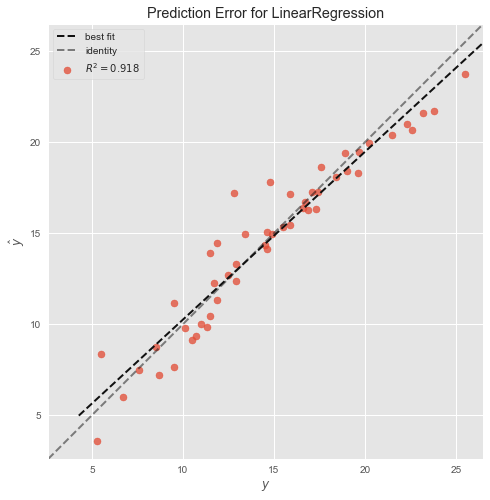

In [27]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

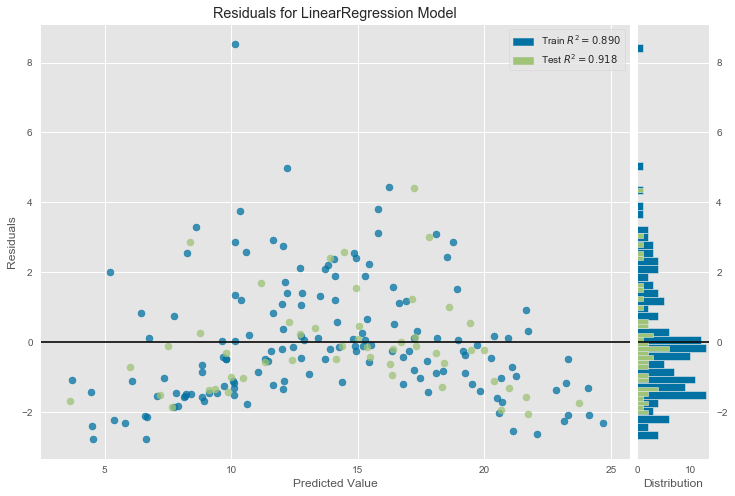

In [28]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [29]:
#interaction effect (Synergy)

df['interaction'] = df['radio'] * df['TV']

X = df[['TV', 'radio', 'interaction']]
y = df.sales

X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_predict = lm6.predict(X_test)

print("RMS Root Mean Squared Error: ", np.sqrt(mean_squared_error(lm6_predict, y_test)))
print("R^2: ", r2_score(y_test, lm6_predict))

RMS Root Mean Squared Error:  0.7011871137164326
R^2:  0.9789736814681261


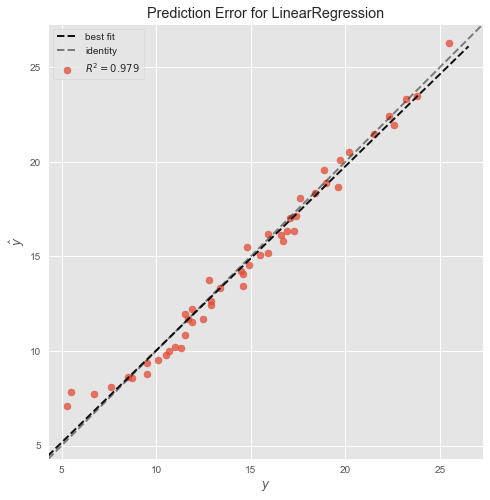

In [30]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 